In [17]:
import pandas as pd
import os
import requests
from matplotlib import pyplot as plt

In [18]:
#Establecer directorio de trabajo
os.chdir("C:/Users/claud/Documents/GitHub/cuentas_nacionales/cuenta_sat_vivi")

In [19]:
#Url básica de la Cueta Satélite de vivienda
urlinicio = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/"
urlfin="/es/0700/false/BISE/2.0/"

In [20]:
#Leer token de txt
token = open("C:/Users/claud/Documents/credencialesinegi.txt", "r").read()

In [21]:
#Función para descargar datos
def indicador(indica):

    url = urlinicio + str(indica) + urlfin + token
    respuesta = requests.get(url).json()
    #Dejar solo el valor del indicador
    result=respuesta["Series"]
    #Dejar solo el valor del indicador y time_period
    result=result[0]["OBSERVATIONS"]
    #Crear dataframe
    df=pd.DataFrame(result)
    #Columnas a minúsculas
    df.columns = map(str.lower, df.columns)
    #Dejar solo las columnas de interés
    df=df[["time_period","obs_value"]]
    #Cambiar variables a numéricas
    df["time_period"]=pd.to_numeric(df["time_period"])
    df["obs_value"]=pd.to_numeric(df["obs_value"])
    return df

In [22]:
#Obtener indicadores de la Cuenta Satélite de vivienda desde la API
part=indicador("6207068169")
variacion=indicador("6207068158")
trabajo=indicador("6207068166")

### Gráficas


In [23]:
plt.rcParams['font.family'] = "Montserrat"

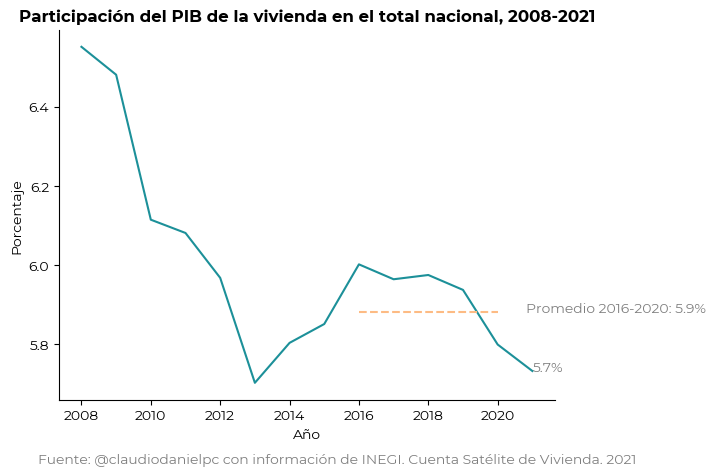

In [24]:
#Gráfica de participación de vivienda
plt.plot(part["time_period"],part["obs_value"],color="#1c9099")
plt.title("Participación del PIB de la vivienda en el total nacional, 2008-2021", fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
#Fuente
plt.text(2024, 5.5, "Fuente: @claudiodanielpc con información de INEGI. Cuenta Satélite de Vivienda. 2021", fontsize=10, alpha=0.5, ha="right")
#Obtener promedio de últimos 5 años
promedio=part["obs_value"].tail(5).mean()
#Línea de promedio de 2016-2020. Inicia en 2016 y termina en 2020
plt.plot([2016,2020],[promedio,promedio],color="#fdbb84",linestyle="--")
#texto de promedio
plt.text(2026, promedio+0.0001, "Promedio 2016-2020: "+str(round(promedio,1))+"%", fontsize=10, alpha=0.5, ha="right")
#Etiqueta en último dato
plt.text(2021, part["obs_value"].iloc[-1], str(round(part["obs_value"].iloc[-1],1))+"%", fontsize=10, alpha=0.5, ha="left")
#Eliminar marco de la gráfica
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
#Guardar gráfica
plt.savefig("partvivi.png", dpi=300, bbox_inches="tight")


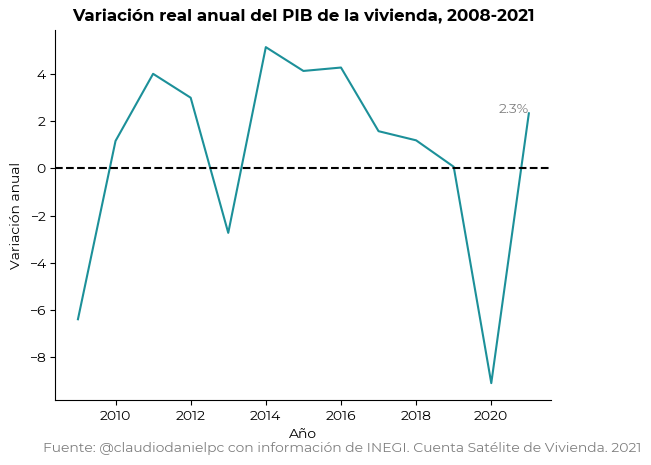

In [25]:
#Gráfica de variación de participación de vivienda
plt.plot(variacion["time_period"],variacion["obs_value"],color="#1c9099")
plt.title("Variación real anual del PIB de la vivienda, 2008-2021", fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Variación anual")
#Fuente
plt.text(2024, -12, "Fuente: @claudiodanielpc con información de INEGI. Cuenta Satélite de Vivienda. 2021", fontsize=10, alpha=0.5, ha="right")
#Línea horizontal en y=0
plt.axhline(y=0, color='black', linestyle='--')

#Etiqueta en último valor a un decimal
plt.text(2021, variacion["obs_value"].iloc[-1], str(round(variacion["obs_value"].iloc[-1],1))+"%", fontsize=10, alpha=0.5, ha="right")
#Eliminar marco de la gráfica
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.savefig("varvivi.png", dpi=300, bbox_inches="tight")

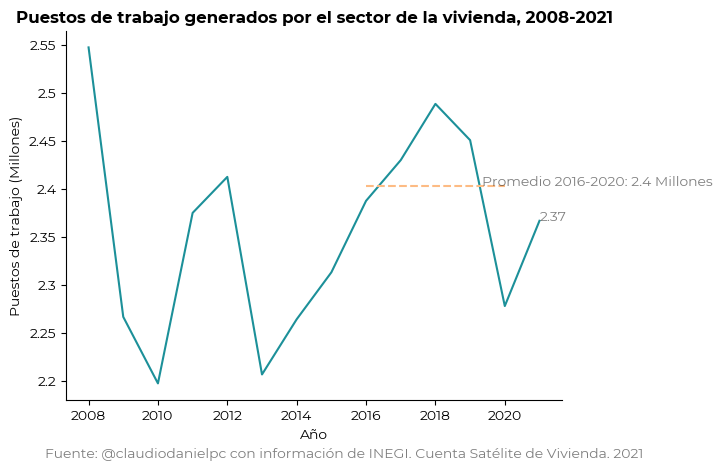

In [26]:
#Gráfica de puestos de trabajo
plt.plot(trabajo["time_period"],trabajo["obs_value"],color="#1c9099")
plt.title("Puestos de trabajo generados por el sector de la vivienda, 2008-2021", fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Puestos de trabajo (Millones)")
#Eje y en millones
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(round(x/1000000,2))))
#Obtener promedio de últimos 5 años
promedio=trabajo["obs_value"].tail(5).mean()
#Línea de promedio de 2016-2020. Inicia en 2016 y termina en 2020
plt.plot([2016,2020],[promedio,promedio],color="#fdbb84",linestyle="--")
#texto de promedio en miles y con 2 decimales
plt.text(2026, promedio+0.001, "Promedio 2016-2020: "+str(round(promedio/1000000,2))+" Millones", fontsize=10, alpha=0.5, ha="right")
#Etiqueta en último dato
plt.text(2021, trabajo["obs_value"].iloc[-1], str(round(trabajo["obs_value"].iloc[-1]/1000000,2)), fontsize=10, alpha=0.5, ha="left")
#Eliminar marco de la gráfica
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
#Fuente
plt.text(2024, 2120000, "Fuente: @claudiodanielpc con información de INEGI. Cuenta Satélite de Vivienda. 2021", fontsize=10, alpha=0.5, ha="right")
plt.savefig("trabajovivi.png", dpi=300, bbox_inches="tight")